# Fractal Lake
This Jupyter notebook performs a box-counting method to determine the fractal dimension of Crater Lake, a caldera lake in the state of Oregon.

In [1]:
import numpy as np
# from scipy.interpolate import interp1d
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This cell makes the text in plots the same as LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size='14')

This cell imports the latitude and longitude coordinates of many coastal points of Crater Lake.

In [3]:
x,y = np.genfromtxt('craterlakeclippedfinal.dat').transpose()

The function below sets up and counts the boxes for the box-counting method.

In [4]:
def box(x, y, i):
    xmin = min(x)
    xmax = max(x)
    yavg = (max(y) + min(y))/2.
    ymin = yavg - (xmax - xmin)/2.
    ymax = yavg + (xmax - xmin)/2.
    test = 0
    N = 0
#   Box setup
    boxlength = (xmax - xmin)/i
    boxminy = ymin
    boxmaxy = ymin + boxlength
#   Box counting starts here:
    while boxmaxy <= ymax:
        boxminx = xmin
        boxmaxx = xmin + boxlength
        while boxmaxx <= xmax:
            k = 0
            while k < len(x):
                if y[k] <= boxmaxy and y[k] >= boxminy and x[k] <= boxmaxx and x[k] >= boxminx:
                    test = 1
                k = k + 1
            if test == 1:
                N = N + 1
            test = 0
#           Shift box up in x
            boxminx=boxmaxx
            boxmaxx=boxminx+boxlength
        boxminy=boxmaxy
        boxmaxy=boxminy+boxlength
    return N

The next cell chooses a series of scale factors, performs the box counting method for those scale factors, and collects the number of boxes that the coastline occupies.

In [5]:
ilist = np.array([2, 4, 8, 12, 16, 20, 24, 32, 42, 64, 72])
Nlist = []
for i in ilist:
    N = box(x,y,i)
    Nlist = np.append(Nlist, N)
Nlist

array([  4.,   8.,  21.,  31.,  48.,  65.,  74., 102., 139., 222., 262.])

In [6]:
Nlist/np.array(ilist)**2

array([1.        , 0.5       , 0.328125  , 0.21527778, 0.1875    ,
       0.1625    , 0.12847222, 0.09960938, 0.07879819, 0.05419922,
       0.05054012])

In [7]:
m, b, rval, pval, stderr = linregress(np.log(ilist), np.log(Nlist))
m, b, rval, stderr

(1.1774551669001352,
 0.5503163358047094,
 0.9991351247094705,
 0.016334156706436665)

This cell performs a linear fit to $\ln N$ vs. $\ln s$; the slope (assigned to `m`) is the fractal dimension.

In [8]:
m, b = np.polyfit(np.log(ilist), np.log(Nlist), 1)
np.polyfit(np.log(ilist), np.log(Nlist), 1, full=True)

(array([1.17745517, 0.55031634]),
 array([0.0301852]),
 2,
 array([1.39134945, 0.25327203]),
 2.4424906541753444e-15)

The linear regression is plotted on a log-log scale.

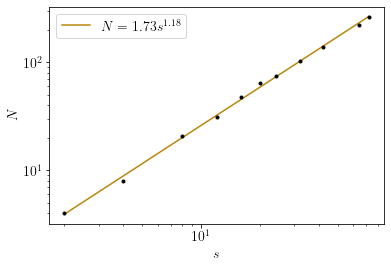

In [18]:
plt.loglog(ilist, np.exp(b) * ilist**m, color='#b8860b')
plt.loglog(ilist, Nlist, 'k.', label='_nolegend_')
plt.xlabel('$s$')
plt.ylabel('$N$')
plt.legend(['$N = %.2f s^{%.2f}$' % (np.exp(b), m), None])

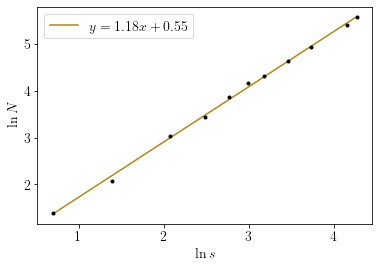

In [12]:
plt.plot(np.log(ilist), m*np.log(ilist) + b, color='#b8860b')
plt.plot(np.log(ilist), np.log(Nlist), 'k.', label='_nolegend_')
plt.xlabel('$\\ln s$')
plt.ylabel('$\\ln N$')
plt.legend(['$y = %0.2f x + %0.2f$' % (m,b), None])

Text(0, 0.5, 'Latitude ($^\\circ$)')

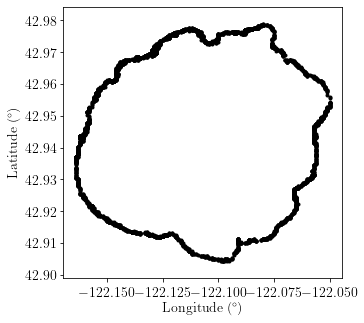

In [10]:
xmid = (min(x) + max(x))/2
xhalflen = (max(x) - min(x))/2
ymid = (max(y) + min(y))/2
plt.figure(figsize=(5,5))
plt.plot(x, y, 'k.')
plt.xlim([xmid - 1.1*xhalflen, xmid + 1.1*xhalflen])
plt.ylim([ymid - 1.1*xhalflen*np.sin(ymid*np.pi/180), ymid + 1.1*xhalflen*np.sin(ymid*np.pi/180)])
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
# plt.savefig('crater-lake-pts.svg')